# GitHub : https://github.com/KarisG/

# Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(X_train.shape, ": X_train")
print(y_train.shape, ": y_train")
print(X_test.shape, ": X_test")
print(y_test.shape, ": y_test")

(50000, 32, 32, 3) : X_train
(50000, 1) : y_train
(10000, 32, 32, 3) : X_test
(10000, 1) : y_test


## Reshape

In [4]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(len(X_test), X_test.shape[1], X_test.shape[2], 3)

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Labels 

In [5]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Visualization

## Images

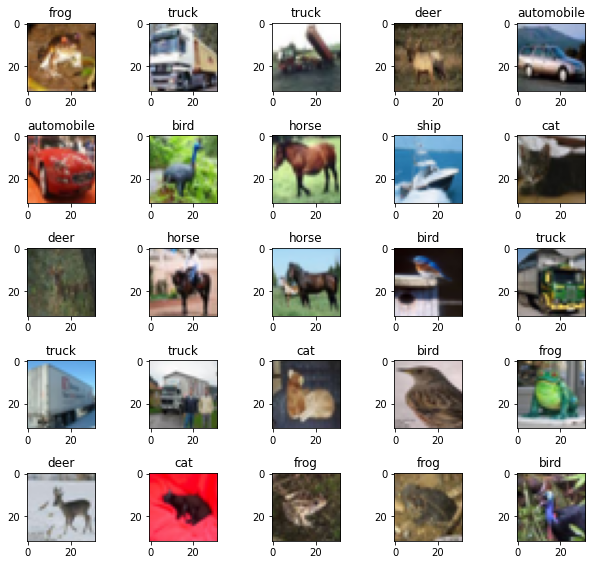

In [6]:
rows = 5
columns = 5
_, ax = plt.subplots(rows,columns, figsize=(10,10))
for i, ax in enumerate(ax.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(classes[y_train[i][0]])
    plt.subplots_adjust(wspace=0.8)

# Normalization

In [7]:
print("Before normalization \n")
print("X_train :  min",X_train.min(), "| max ", X_train.max())
print("X_test :  min",X_test.min(), "| max ", X_test.max())

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

print("After normalization \n")
print("X_train :  min",X_train.min(), "| max ", X_train.max())
print("X_test :  min",X_test.min(), "| max ", X_test.max())

Before normalization 

X_train :  min 0 | max  255
X_test :  min 0 | max  255
After normalization 

X_train :  min 0.0 | max  1.0
X_test :  min 0.0 | max  1.0


# Model

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.layers.Input((32,32,3)))

In [10]:
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 128)      5

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
XX_train, X_valid, yy_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

In [15]:
history = model.fit(XX_train, yy_train, epochs = 15, batch_size = 64, verbose = 1, validation_data = (X_valid, y_valid))

Epoch 1/15
625/625 [==============================] - 53s 84ms/step - loss: 1.5374 - accuracy: 0.4785 - val_loss: 1.2372 - val_accuracy: 0.5628
Epoch 2/15
625/625 [==============================] - 53s 84ms/step - loss: 1.0848 - accuracy: 0.6179 - val_loss: 1.0319 - val_accuracy: 0.6402
Epoch 3/15
625/625 [==============================] - 51s 82ms/step - loss: 0.9700 - accuracy: 0.6597 - val_loss: 1.0746 - val_accuracy: 0.6318
Epoch 4/15
625/625 [==============================] - 52s 83ms/step - loss: 0.8955 - accuracy: 0.6863 - val_loss: 0.9391 - val_accuracy: 0.6746
Epoch 5/15
625/625 [==============================] - 52s 83ms/step - loss: 0.8218 - accuracy: 0.7127 - val_loss: 0.8157 - val_accuracy: 0.7155
Epoch 6/15
625/625 [==============================] - 52s 83ms/step - loss: 0.7763 - accuracy: 0.7273 - val_loss: 0.9056 - val_accuracy: 0.6922
Epoch 7/15
625/625 [==============================] - 52s 84ms/step - loss: 0.7134 - accuracy: 0.7483 - val_loss: 0.7996 - val_accuracy:

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.8254 - accuracy: 0.7284


[0.8253594040870667, 0.7283999919891357]

In [17]:
pred = model.predict(X_test)

In [18]:
y_pred = np.argmax(pred, axis=-1)

In [19]:
y_pred[0]

3

In [20]:
y_test[0]

array([3], dtype=uint8)

# Graphics

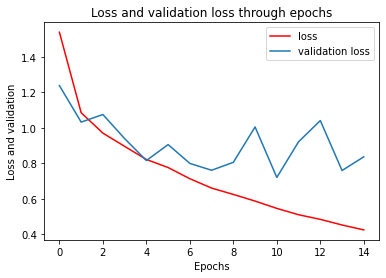

In [22]:
plt.plot(history.history['loss'], 'r', label="loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss and validation")
plt.title("Loss and validation loss through epochs")
plt.legend();

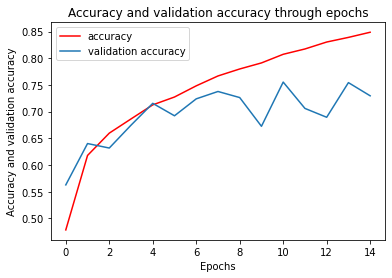

In [23]:
plt.plot(history.history['accuracy'], 'r', label="accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy and validation accuracy")
plt.title("Accuracy and validation accuracy through epochs")
plt.legend();

# Metrics

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [25]:
cm = confusion_matrix(y_pred, y_test)

In [26]:
print(classification_report(y_pred, y_test, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.72      0.84      0.77       859
  automobile       0.81      0.90      0.85       894
        bird       0.52      0.76      0.62       684
         cat       0.55      0.57      0.56       961
        deer       0.85      0.54      0.66      1567
         dog       0.67      0.65      0.66      1024
        frog       0.61      0.92      0.73       659
       horse       0.80      0.81      0.80       995
        ship       0.85      0.82      0.84      1044
       truck       0.92      0.70      0.79      1313

    accuracy                           0.73     10000
   macro avg       0.73      0.75      0.73     10000
weighted avg       0.75      0.73      0.73     10000



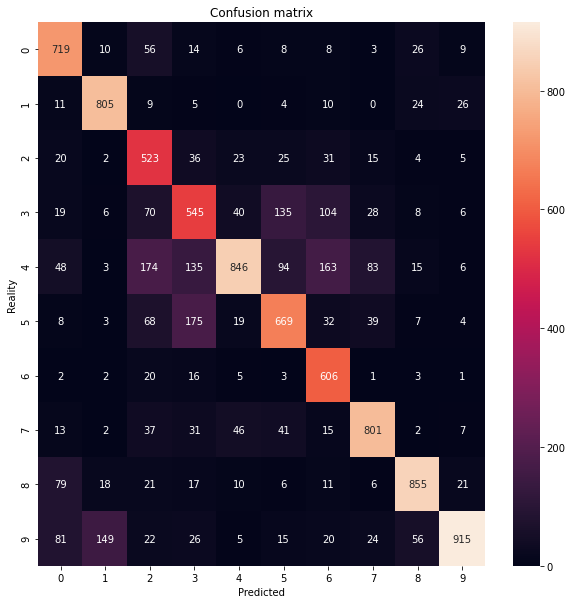

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d");
plt.xlabel("Predicted")
plt.ylabel("Reality")
plt.title("Confusion matrix")
plt.show()

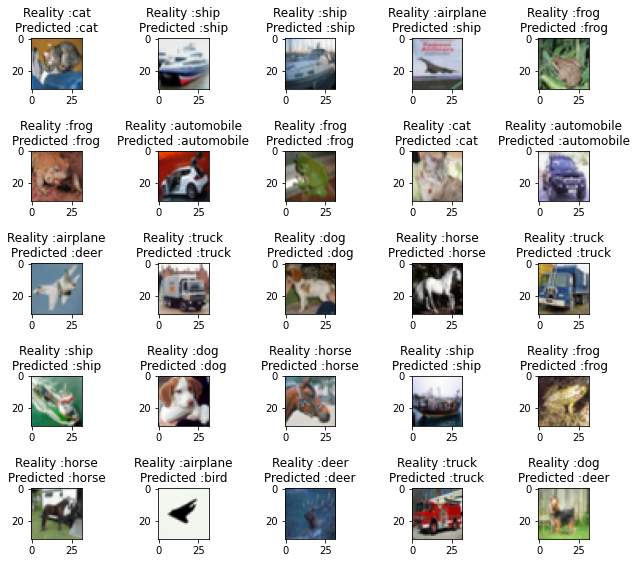

In [28]:
rows = 5
columns = 5
_, ax = plt.subplots(rows,columns, figsize=(10,10))
for i, ax in enumerate(ax.flatten()):
    ax.imshow(X_test[i])
    ax.set_title("Reality :"+str(classes[y_test[i][0]])+"\nPredicted :"+str(classes[y_pred[i]]))
    plt.subplots_adjust(wspace=1.5)

* So, as we can see my model is not perfect because there is still some errors. One thing that I can do is use transfer learning to have a way little loss and a high accuracy.